In [29]:
#importar bibliotecas utiles. De no tenerse alguna (import not found) se debe instalar, generalmente con pip
import scipy.signal
from scipy.io import wavfile 
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

#definicion de 3 bloques principales: TX, canal y RX

In [30]:
# obtiene la frecuencia moduladora de cada señal
def frecuencia_moduladora(signal):
    fft = np.fft.fft(signal[0])
    freqs = np.fft.fftfreq(len(signal[0]))
    
    frecuencia_pico = np.argmax(np.abs(fft))
    frecuencia_fm = freqs[frecuencia_pico]
    
    return abs(frecuencia_fm * signal[1])

# signal es un vector de 2 pociciones 
# proveniente de una lista anidada
# option == 0 multiplexa el tono
# option !=0 modula señales individuales
def am_dsb_sc(signal,option):

    # option == 0 multiplexar tono 3 veces consigo misma
    if (option==0):
        fm = frecuencia_moduladora(signal)
        fc = 10 * fm
        fc1= 20 * fm
        fc2= 30 * fm

        time = np.linspace(0., signal[0].shape[0] / signal[1], signal[0].shape[0])
        carrier  = np.cos(2*np.pi*fc*time)
        carrier1  = np.cos(2*np.pi*fc1*time)
        carrier2  = np.cos(2*np.pi*fc2*time)

        signal_dsbsc = carrier * signal[0]
        signal_dsbsc1 = carrier1 * signal[0]
        signal_dsbsc2 = carrier2 * signal[0]
        samplerate_dsb_sc = signal[1]
        add = signal_dsbsc+signal_dsbsc1+signal_dsbsc2

        dsb_sc = []
        dsb_sc.append(add)
        dsb_sc.append(samplerate_dsb_sc)
        # se agrega una posicion mas para escribir el titulo de la grafica
        dsb_sc.append(signal[2])
    
    # option != 0 modular señales individualmente
    elif(option==1):
        fm = frecuencia_moduladora(signal)
        fc = 10 * fm

        time = np.linspace(0., signal[0].shape[0] / signal[1], signal[0].shape[0])
        carrier  = np.cos(2*np.pi*fc*time)
        
        signal_dsbsc = carrier * signal[0]
        samplerate_dsb_sc = signal[1]
        
        dsb_sc = []
        dsb_sc.append(signal_dsbsc)
        dsb_sc.append(samplerate_dsb_sc)
        # se agrega una posicion mas para escribir el titulo de la grafica
        dsb_sc.append(signal[2])

    return dsb_sc # devuelve una lista de 3 posiciones

# signal_add suma listas con distintas longitudes, espcecial para los vowel
def signal_add(signal1, signal2):
    if len(signal1) < len(signal2):
        for i in range(len(signal1)):
            output = signal2
            output[i] = signal2[i] + signal1[i]
    else:
        for i in range(len(signal2)):
            output = signal1
            output[i] = signal1[i] + signal2[i]
    return output

# mux_option = 0 para multiplexar el tono de prueba consigo mismo
# mux_option = 1 para multiplexar los 3 vowel
# x_t es una lista anidada con el total de los datos
# x_t(signal, samplerate, name_signal)
def multiplexor_fdm(x_t, mux_option):
    
    # multiplexar tono
    if (mux_option==0):
        dsb_sc = am_dsb_sc(x_t[0],0) # a_dsb_sc entrega una lista de 2 posiciones
        mux_signal = []
        mux_signal.append(dsb_sc[0])
        mux_signal.append(dsb_sc[1])
        # se agrega una posicion mas para nombrar las gráficas
        mux_signal.append("Multiplexación de Tonos (3 tonos)")

    # mutiplexa señales reales vowel
    else:
        dsb_sc1 = am_dsb_sc(x_t[1],1)
        dsb_sc2 = am_dsb_sc(x_t[2],1)
        dsb_sc3 = am_dsb_sc(x_t[3],1)
        
        # suma final de las señales 
        dsb_add = signal_add(dsb_sc1[0], dsb_sc2[0])

        mux_signal = []
        mux_signal.append(signal_add(dsb_add, dsb_sc3[0]))
        mux_signal.append(x_t[1][1])
        # # se agrega una posicion mas para nombrar las gráficas
        mux_signal.append("Multiplexacion de señales vowel 1, 2, 3")

    return mux_signal # entrega una lista con 3 posiciones mas un posicion con string

# x_t que se recibe, es una lista anidada de las 4 señales
# transmisor_option == 0 multiplexa los tonos 
# transmisor_option == 1 multiplexa los vowel
# transmisor_option == 2 modula individualmente las señales
def transmisor(x_t, transmisor_option):

    if(transmisor_option == 0):
        transmisor_signal = multiplexor_fdm(x_t, 0)

    if(transmisor_option == 1 ):
        transmisor_signal = multiplexor_fdm(x_t, 1)

    elif(transmisor_option == 2):
        # 0: tono   1: vowel1   2: vowel2   3: vowel3
        signal_option = int(input("0: tono   1: vowel1   2: vowel2   3: vowel3"))
        transmisor_signal = am_dsb_sc(x_t[signal_option], 1)

    #return s_t #note que s_t es una unica señal utilizando un unico array, NO una lista
    return transmisor_signal # es una lista con 3 posisiones

In [31]:
def receptor(s_t_prima,f_rf):
    # Note que f_rf es la frecuencia utilizada para la seleccionar la señal que se desea demodular
    #Su codigo para el receptor va aca  
    m_t_reconstruida=s_t_prima #eliminar cuando se tenga solucion propuesta
    
    #note que en el caso de multiples señales
    
    return m_t_reconstruida

In [32]:
def white_noise(signal):
    print("White noise \n")
    print(signal)
    mu = 0
    sigma = 0.1 * np.std(signal[0])
    white_noise = np.random.normal(mu, sigma, signal[0].shape[0])

    return white_noise

def canal(signal):
    
    # #Note que los parámetros mu (media) y sigma (desviacion) del ruido blanco Gaussiano deben cambiarse segun especificaciones
    # canal_noise = white_noise(signal)
    
    # signal_noise= canal_noise + signal[0]
    # samplerate_noise = signal[1]
    
    # signal_prima = []
    # signal_prima.append(signal_noise)
    # signal_prima.append(samplerate_noise)

    signal_prima = signal

    return  signal_prima

In [33]:
#Modulo Graficación
# Grafica la señal con respecto al tiempo

# funcion para delimitar el eje x en las graficas para señales reales o tono
def limite_x_tiempo(nombre):
    x = 0
    if (nombre=="Tono" or nombre== "Multiplexación de Tonos (3 tonos)" ):
        x = 0.01
    else:
        x = 0.1
    return x

def limite_x_psd(nombre):
    x = 0
    if (nombre=="Tono"):
        x = 2
    else:
        x = 1.5
    return x

# Grafica la señal con respecto al tiempo
def plot_time_signal(titulo_grafico, signal):
    
    time_signal = np.linspace(0., signal[0].shape[0] / signal[1], signal[0].shape[0]) #shape entrega una tupla
    plt.figure()
    plt.plot(time_signal,signal[0])

    plt.xlim([0, limite_x_tiempo(titulo_grafico)]) #mostrar solo parte de la onda
    plt.xlabel('Tiempo   [s]')
    plt.ylabel('Amplitud [V]')
    plt.title(titulo_grafico)
    return 0

# Grafica la señal con respecto a la frecuencia
def plot_psd_signal(titulo_grafico, signal):

    (f, S)= scipy.signal.welch(signal[0], signal[1], nperseg=4*1024)
    plt.figure()
    plt.semilogy(f, S)
    
    plt.xlim([0, signal[1]/(limite_x_psd(titulo_grafico))])
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.title(titulo_grafico)
    return 0

In [34]:
## Inicio de ejecucion ##
#Se da con ejemplo de tono, pasandolo por todo el sistema sin ningun cambio

#leer tono desde archivo
samplerate_tono, tono = wavfile.read("datos/tono.wav")
samplerate_vowel1, vowel1 = wavfile.read("datos/vowel_1.wav")
samplerate_vowel2, vowel2 = wavfile.read("datos/vowel_2.wav")
samplerate_vowel3, vowel3 = wavfile.read("datos/vowel_3.wav")

#oir tono rescatado. Esta funcion sirve tambien como transductor de salida 
#Note la importancia de la frecuencia de muestreo (samplerate), la cual es diferente a la frecuencia fm del tono.
sd.play(tono, samplerate_tono)

#agregar el tono a la lista X_t requerida por el transmisor
x_t = []
x_t.append([tono, samplerate_tono, "Tono"])
x_t.append([vowel1, samplerate_vowel1, "Vowel 1"])
x_t.append([vowel2, samplerate_vowel2, "Vowel 2"])
x_t.append([vowel3, samplerate_vowel3, "Vowel 3"])

#print("Se envia una lista con "+str(len(x_t))+" señales")

0

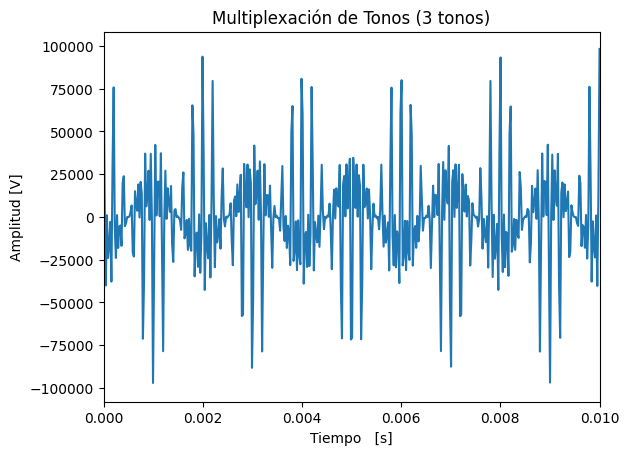

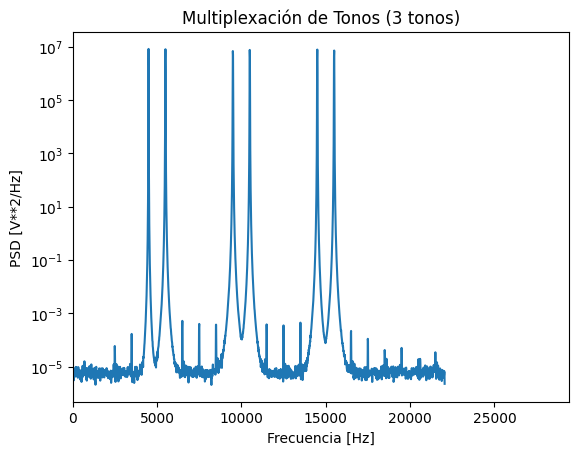

In [40]:
# transmisor_option = 0 para multiplexar el tono de prueba consigo misma
# transmisor_option = 1 para multiplexar los vowel
# transmisor_option = 2 para modular (dsb_sc) señales individuales
transmisor_option = 0

# transmisor entrega una lista s_t con 3  posisiones, 2 de la señal, 1 con un string
s_t = transmisor(x_t, transmisor_option)
plot_time_signal(s_t[2], s_t) # s_t[2] contiene el nombre de la señal para el grafico
plot_psd_signal(s_t[2], s_t)




In [39]:
frecuencia_moduladora(s_t)
print(frecuencia_moduladora(s_t))


#llamar funcion que modela el canal
s_t_prima = canal(s_t)

4500.0


In [37]:
#llamar funcion de receptor
m_t_reconstruida=receptor(s_t_prima, samplerate_tono)

#graficar señal recibida
# plt.plot(np.linspace(0., m_t_reconstruida.shape[0] / samplerate_tono, m_t_reconstruida.shape[0]),m_t_reconstruida)
# plt.xlim([0, 0.01]) #mostrar solo parte de la onda
